In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data=sb.load_dataset("titanic")

In [34]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [36]:
data["age_ran"]=data["age"]
ran_dom=data['age'].dropna().sample(data['age'].isnull().sum(),random_state=0)
ran_dom.index=data[data['age'].isnull()].index
data.loc[data['age'].isnull(),"age"]=ran_dom

In [37]:
data= data.drop(columns=["age_ran"])


In [38]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
data['deck']=data['deck'].astype('string')
data['deck']=data['deck'].fillna('Missing')
data['deck']=data['deck'].astype('category')
data['deck']=data['deck'].astype(str).str[0]

In [41]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,M,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,M,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,M,Southampton,no,True


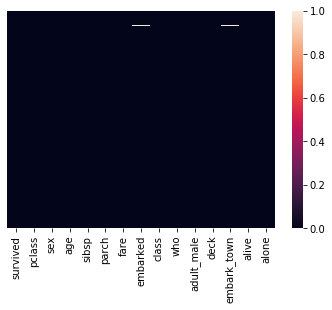

In [42]:
sb.heatmap(data.isnull(),yticklabels=False)

In [43]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [44]:
data=data.drop(columns=['embarked','embark_town'],axis=1)

In [45]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
deck          0
alive         0
alone         0
dtype: int64

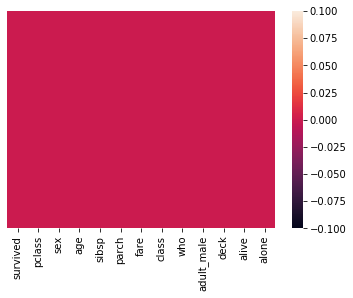

In [46]:
sb.heatmap(data.isnull(),yticklabels=False)

In [47]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,M,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,M,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,M,no,True


In [48]:
data=data.drop(columns=['adult_male','parch','who','sibsp','fare'],axis=1)

In [49]:
data.head()

,survived,pclass,sex,age,class,deck,alive,alone
0,0,3,male,22.0,Third,M,no,False
1,1,1,female,38.0,First,C,yes,False
2,1,3,female,26.0,Third,M,yes,True
3,1,1,female,35.0,First,C,yes,False
4,0,3,male,35.0,Third,M,no,True


In [50]:
data['deck'].value_counts()

M    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [51]:
es=data.groupby(['deck'])['survived'].mean()

In [52]:
es=es.sort_values().index
es

Index(['M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='deck')

In [53]:
ed={k:i for i,k in enumerate(es,0)}
ed

{'M': 0, 'A': 1, 'G': 2, 'C': 3, 'F': 4, 'B': 5, 'E': 6, 'D': 7}

In [54]:
data['deck']=data['deck'].map(ed)

In [55]:
data.head()

,survived,pclass,sex,age,class,deck,alive,alone
0,0,3,male,22.0,Third,0,no,False
1,1,1,female,38.0,First,3,yes,False
2,1,3,female,26.0,Third,0,yes,True
3,1,1,female,35.0,First,3,yes,False
4,0,3,male,35.0,Third,0,no,True


In [57]:
data=data.drop(columns=['alive'],axis=1)

In [60]:
sex=pd.get_dummies(data['sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [61]:
clas=pd.get_dummies(data['class'],drop_first=True)

In [62]:
clas.head()

,Second,Third
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [63]:
alon=pd.get_dummies(data['alone'],drop_first=True)

In [64]:
data=pd.concat([data,sex,clas,alon],axis=1)

In [65]:
data.head()

,survived,pclass,sex,age,class,deck,alone,male,Second,Third,True
0,0,3,male,22.0,Third,0,False,1,0,1,0
1,1,1,female,38.0,First,3,False,0,0,0,0
2,1,3,female,26.0,Third,0,True,0,0,1,1
3,1,1,female,35.0,First,3,False,0,0,0,0
4,0,3,male,35.0,Third,0,True,1,0,1,1


In [67]:
data=data.drop(columns=['sex','class','alone'])
data.head()

,survived,pclass,age,deck,male,Second,Third,True
0,0,3,22.0,0,1,0,1,0
1,1,1,38.0,3,0,0,0,0
2,1,3,26.0,0,0,0,1,1
3,1,1,35.0,3,0,0,0,0
4,0,3,35.0,0,1,0,1,1


In [68]:
X=data.drop("survived",axis=1)
y=data['survived']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_model=LogisticRegression()

In [76]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
pred=log_model.predict(X_test)

In [78]:
from sklearn.metrics import classification_report

In [80]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82       174\n           1       0.74      0.73      0.73       121\n\n    accuracy                           0.78       295\n   macro avg       0.78      0.77      0.78       295\nweighted avg       0.78      0.78      0.78       295\n'

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test,pred)

array([[143,  31],
       [ 33,  88]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test,pred)

0.7830508474576271